In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [17]:
df=pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [5]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [6]:
df.shape

(53392, 33)

In [18]:
df1=df.copy

In [19]:
df.drop(columns=['Class','LocationAbbr','Datasource','Data_Value_Unit','Data_Value_Type','ClassID','TopicID','Question','GeoLocation','StratificationCategoryId1','StratificationID1','Total','Data_Value_Alt','Data_Value_Footnote_Symbol','Data_Value_Footnote'],axis=1,inplace=True)
df.head()

,YearStart,YearEnd,LocationDesc,Topic,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1
0,2011,2011,Alabama,Obesity / Weight Status,32.0,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN,Q036,VALUE,1,Total,Total
1,2011,2011,Alabama,Obesity / Weight Status,32.3,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN,Q036,VALUE,1,Gender,Male
2,2011,2011,Alabama,Obesity / Weight Status,31.8,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN,Q036,VALUE,1,Gender,Female
3,2011,2011,Alabama,Obesity / Weight Status,33.6,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,Q036,VALUE,1,Education,Less than high school
4,2011,2011,Alabama,Obesity / Weight Status,32.8,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,Q036,VALUE,1,Education,High school graduate


In [20]:
df.isnull().sum()

YearStart                      0
YearEnd                        0
LocationDesc                   0
Topic                          0
Data_Value                  5046
Low_Confidence_Limit        5046
High_Confidence_Limit       5046
Sample_Size                 5046
Age(years)                 41954
Education                  45764
Gender                     49578
Income                     40043
Race/Ethnicity             38136
QuestionID                     0
DataValueTypeID                0
LocationID                     0
StratificationCategory1        0
Stratification1                0
dtype: int64

In [39]:
df['LocationID'].unique().size

55

In [22]:
df.drop_duplicates()
df.shape

(53392, 18)

In [23]:
df.dropna(subset=['Data_Value','Low_Confidence_Limit','High_Confidence_Limit ','Sample_Size'],inplace=True)
df.shape

(48346, 18)

In [32]:
df['Income'].fillna('Income not reported',inplace=True)
df['Age(years)'].fillna('Age not Reported',inplace=True)
df['Education'].fillna('Education not reported',inplace=True)
df['Gender'].fillna('Gender not reported',inplace=True)
df['Race/Ethnicity'].fillna('Race not reported',inplace=True)
df['Income'].replace(to_replace='Data not reported',value='Income not reported',inplace=True)
df.isnull().sum()

YearStart                  0
YearEnd                    0
LocationDesc               0
Topic                      0
Data_Value                 0
Low_Confidence_Limit       0
High_Confidence_Limit      0
Sample_Size                0
Age(years)                 0
Education                  0
Gender                     0
Income                     0
Race/Ethnicity             0
QuestionID                 0
DataValueTypeID            0
LocationID                 0
StratificationCategory1    0
Stratification1            0
dtype: int64

In [33]:
df.head()

,YearStart,YearEnd,LocationDesc,Topic,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1
0,2011,2011,Alabama,Obesity / Weight Status,32.0,30.5,33.5,7304.0,Age not Reported,Education not reported,Gender not reported,Income not reported,Race not reported,Q036,VALUE,1,Total,Total
1,2011,2011,Alabama,Obesity / Weight Status,32.3,29.9,34.7,2581.0,Age not Reported,Education not reported,Male,Income not reported,Race not reported,Q036,VALUE,1,Gender,Male
2,2011,2011,Alabama,Obesity / Weight Status,31.8,30.0,33.6,4723.0,Age not Reported,Education not reported,Female,Income not reported,Race not reported,Q036,VALUE,1,Gender,Female
3,2011,2011,Alabama,Obesity / Weight Status,33.6,29.9,37.6,1153.0,Age not Reported,Less than high school,Gender not reported,Income not reported,Race not reported,Q036,VALUE,1,Education,Less than high school
4,2011,2011,Alabama,Obesity / Weight Status,32.8,30.2,35.6,2402.0,Age not Reported,High school graduate,Gender not reported,Income not reported,Race not reported,Q036,VALUE,1,Education,High school graduate


In [36]:
print(df['DataValueTypeID'].unique())
df.drop(columns=['DataValueTypeID'],axis=1,inplace=True)

['VALUE']


In [40]:
df.drop(columns=['LocationID'],axis=1,inplace=True)

In [41]:
df.head()

,YearStart,YearEnd,LocationDesc,Topic,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,QuestionID,StratificationCategory1,Stratification1
0,2011,2011,Alabama,Obesity / Weight Status,32.0,30.5,33.5,7304.0,Age not Reported,Education not reported,Gender not reported,Income not reported,Race not reported,Q036,Total,Total
1,2011,2011,Alabama,Obesity / Weight Status,32.3,29.9,34.7,2581.0,Age not Reported,Education not reported,Male,Income not reported,Race not reported,Q036,Gender,Male
2,2011,2011,Alabama,Obesity / Weight Status,31.8,30.0,33.6,4723.0,Age not Reported,Education not reported,Female,Income not reported,Race not reported,Q036,Gender,Female
3,2011,2011,Alabama,Obesity / Weight Status,33.6,29.9,37.6,1153.0,Age not Reported,Less than high school,Gender not reported,Income not reported,Race not reported,Q036,Education,Less than high school
4,2011,2011,Alabama,Obesity / Weight Status,32.8,30.2,35.6,2402.0,Age not Reported,High school graduate,Gender not reported,Income not reported,Race not reported,Q036,Education,High school graduate


In [43]:
dummy_data=pd.get_dummies(df[['LocationDesc','Topic','Age(years)','Education','Gender','Income','Race/Ethnicity','QuestionID','StratificationCategory1','Stratification1']])

In [44]:
dummy_data.head()

,LocationDesc_Alabama,LocationDesc_Alaska,LocationDesc_Arizona,LocationDesc_Arkansas,LocationDesc_California,LocationDesc_Colorado,LocationDesc_Connecticut,LocationDesc_Delaware,LocationDesc_District of Columbia,LocationDesc_Florida,...,Stratification1_High school graduate,Stratification1_Hispanic,"Stratification1_Less than $15,000",Stratification1_Less than high school,Stratification1_Male,Stratification1_Non-Hispanic Black,Stratification1_Non-Hispanic White,Stratification1_Other,Stratification1_Some college or technical school,Stratification1_Total
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
df.drop(columns=['LocationDesc','Topic','Age(years)','Education','Gender','Income','Race/Ethnicity','QuestionID','StratificationCategory1','Stratification1'],inplace=True)
df=pd.merge(df,dummy_data,left_index=True,right_index=True)
df.shape

(48346, 138)

<AxesSubplot:xlabel='Data_Value', ylabel='Density'>

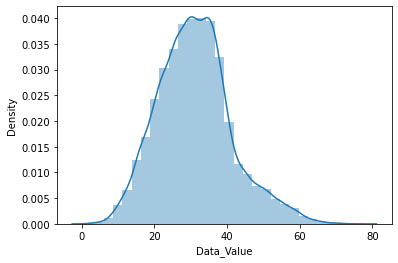

In [49]:
sns.distplot(df['Data_Value'],bins=30)


In [46]:
x=df.drop('Data_Value',axis=1)
y=df['Data_Value']

In [47]:
scalar=StandardScaler()
x=scalar.fit_transform(x)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [51]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)



In [53]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("rmse", rmse)
print('r2',r2)

rmse 0.33850699232586445
r2 0.9988824140738569


In [54]:
print(y_test)

25754    70.3
2377     34.6
38553    32.3
18340    20.6
35830    21.0
         ... 
7192     53.9
31047    23.7
51264    12.7
2730     40.3
7808     31.3
Name: Data_Value, Length: 9670, dtype: float64


In [55]:
print(y_pred)

[70.93826771 34.49734974 32.28983021 ... 12.54153919 40.50403309
 31.31049061]
